# Problem Statement: Concrete Strength Prediction

Objective:To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

Resources Available: The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

Attribute Information:Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

    Name			Data Type		Measurement			Description
1.	Cement (cement)				quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)				quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)				quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable 

#### 1) Exploratory Data Quality Report Reflecting the Following:  
a)Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)

b)Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)

c)Using various plots, write the insights/observations about it. (6 Marks)

In [1]:
# Import Libraries
import numpy as np
import pandas as pd  
# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns 

#adds hue to the color
sns.set(color_codes=True) 

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore') 

# for splitting data to train and test
from sklearn.model_selection import train_test_split 

# for degree 2 and 3 features
from sklearn.preprocessing import PolynomialFeatures 

# for importing model libraries
from sklearn import model_selection 

#plotting missing values
import missingno as msno_plot 

# calculate accuracy measures and confusion matrix
from sklearn import metrics 

#mean calculation
import statistics

In [2]:
df_concrete = pd.read_csv("concrete.csv")
df_concrete_backup = df_concrete # taking backup
display(df_concrete.shape)
display(df_concrete.sort_values(by=['cement','age'],ascending = False))

(1030, 9)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
313,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,270,74.17
776,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,180,71.62
741,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,90,69.66
101,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
732,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
...,...,...,...,...,...,...,...,...,...
230,108.3,162.4,0.0,203.5,0.0,938.2,849.0,3,2.33
390,102.0,153.0,0.0,192.0,0.0,887.0,942.0,90,25.46
417,102.0,153.0,0.0,192.0,0.0,887.0,942.0,28,17.28
183,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.68


- There are records with different values for age and stregth features but same values for other features. 
- Looks like the same concrete material strength is measured at different age(days)

1030 records

In [3]:
df_concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


- No null values 
- All are numeric values

In [4]:
df_concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


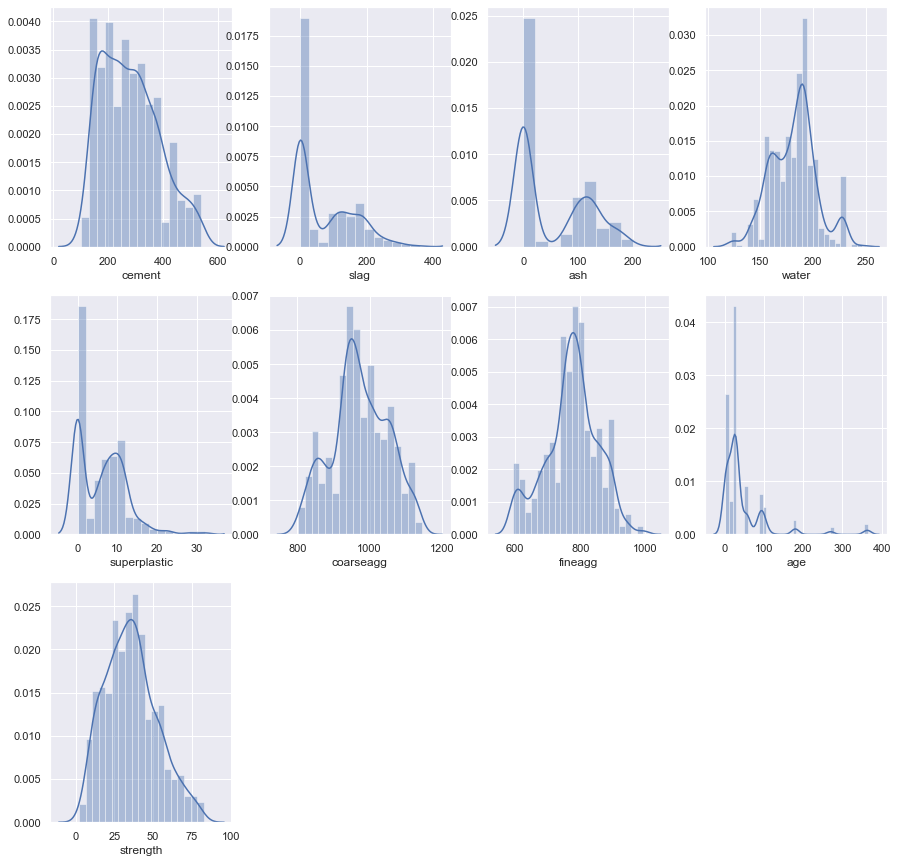

In [5]:
#analysis of the body of distributions/tails.
plt.figure(figsize=(15,15))
pos = 1
for i in df_concrete.columns:
    plt.subplot(3, 4, pos)
    sns.distplot(df_concrete[i])
    pos += 1 

- Some of the columns are multimodal distribution like stag, ash, superplastic and age.
- stag, ash and superplastic have zero values. Around 25% or more values are zero in the distribution
- age is a lot right skewed. i guess due to outliers.

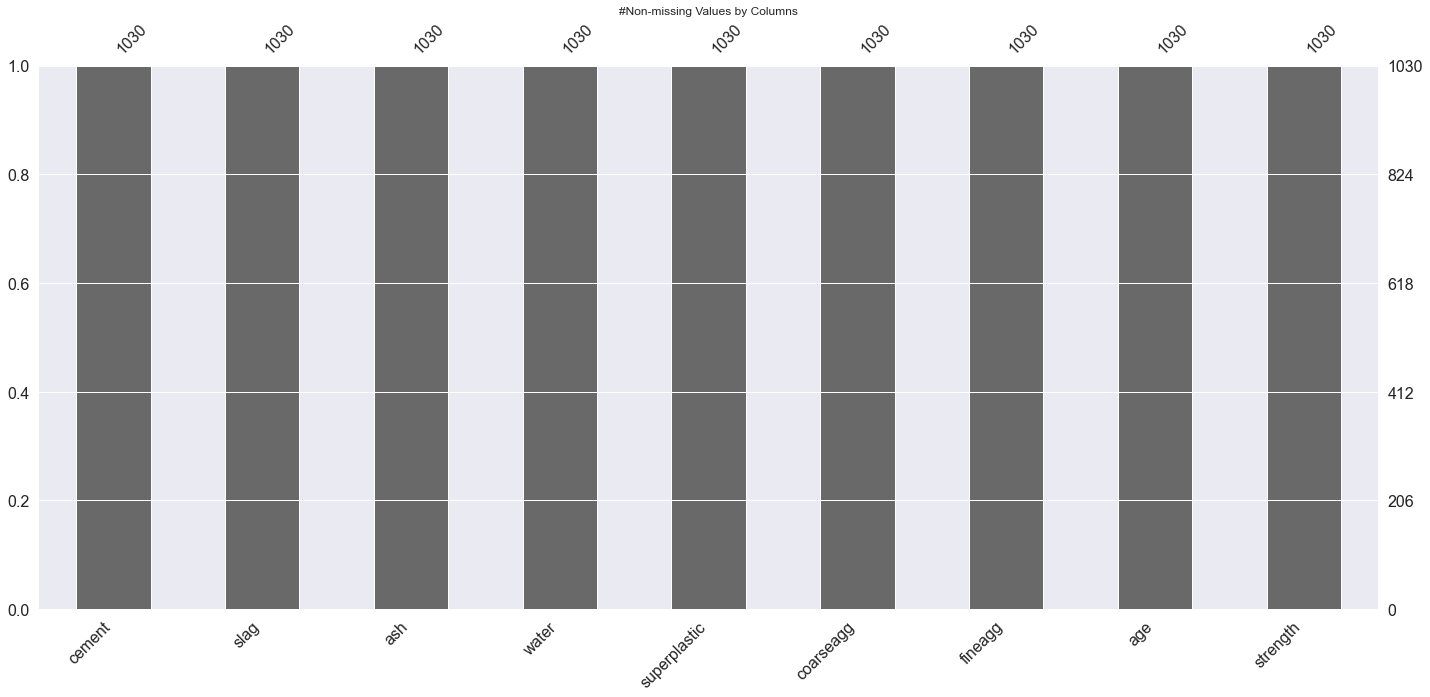

In [6]:
#checking the missing values using Barplot
plt.title('#Non-missing Values by Columns')
msno_plot.bar(df_concrete);

- no missing values

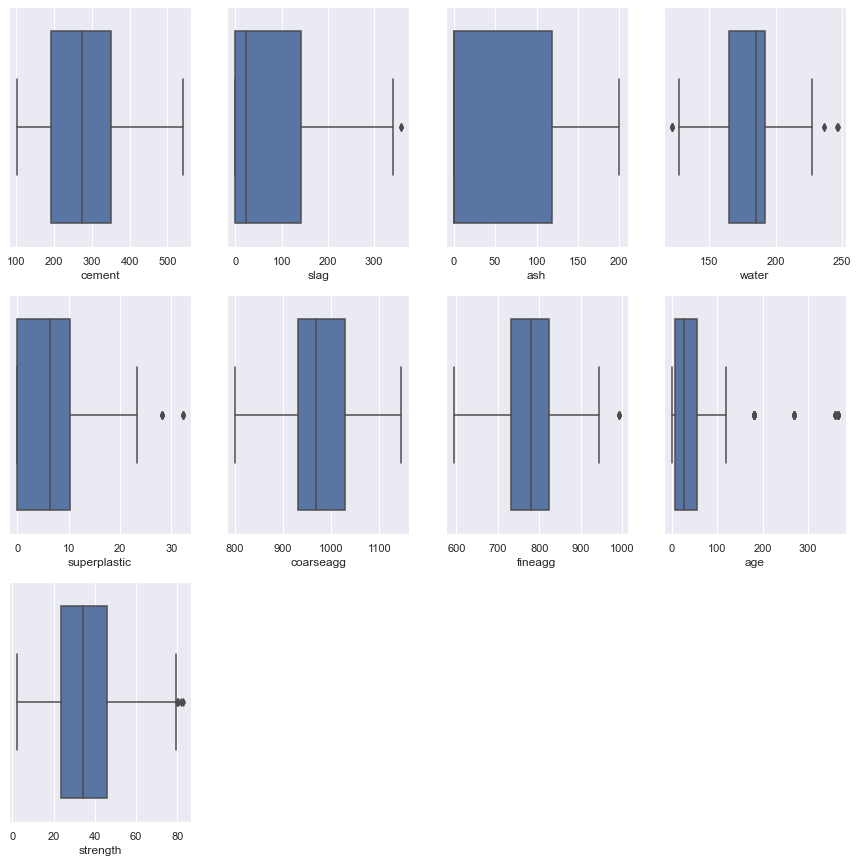

In [7]:
#Checking Outliers
plt.figure(figsize=(15,15))
pos = 1
for i in df_concrete.columns:
    plt.subplot(3, 4, pos)
    sns.boxplot(df_concrete[i])
    pos += 1 
    

In [8]:
#outliers
col_names=['slag','water','superplastic','fineagg','age','strength']
outliers = pd.DataFrame()
for i in col_names:
    q1, q2, q3 = df_concrete[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    orows = pd.DataFrame(df_concrete[(df_concrete[i] < (q1 - 1.5 * IQR)) | (df_concrete[i] > (q3 + 1.5 * IQR))], columns=['outliers'])    
    tempDf = pd.DataFrame({'Feature':[i], 'Outliers count': orows.size, '% of Total Records': orows.size*100/df_concrete[i].size})
    outliers = pd.concat([outliers, tempDf])
outliers.sort_values(by='% of Total Records',ascending = False)

,Feature,Outliers count,% of Total Records
0,age,59,5.728155
0,superplastic,10,0.970874
0,water,9,0.873786
0,fineagg,5,0.485437
0,strength,4,0.388350
0,slag,2,0.194175


- stag, water, superplastic, fineagg, age and strength have outliers. Especially age has many outliers
- we will handle outliers in the data preparation step later.

In [9]:
#Duplicates Check
df_concrete.duplicated().sum()

25

In [10]:
#Duplicates Records percentage
df_concrete.duplicated().sum()*100/1030

2.4271844660194173

- 25 records are duplicates. which is around 2.5% of the data. We will drop duplicates during data preparation. 

<b>Comment</b>

- Blast Furnace Slag (slag),Fly Ash (ash) and Superplasticizer (superplastic) min value is zero. 
- Blast Furnace Slag and Fly Ash can be zero if not used as a replacement to a part of cement. 
- Superplasticizer can be zero if not used to reduce water in concrete

#### 2) Bi-variate analysis between the predictor variables and also between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves and write the insights/business understanding of the same. (8 marks)

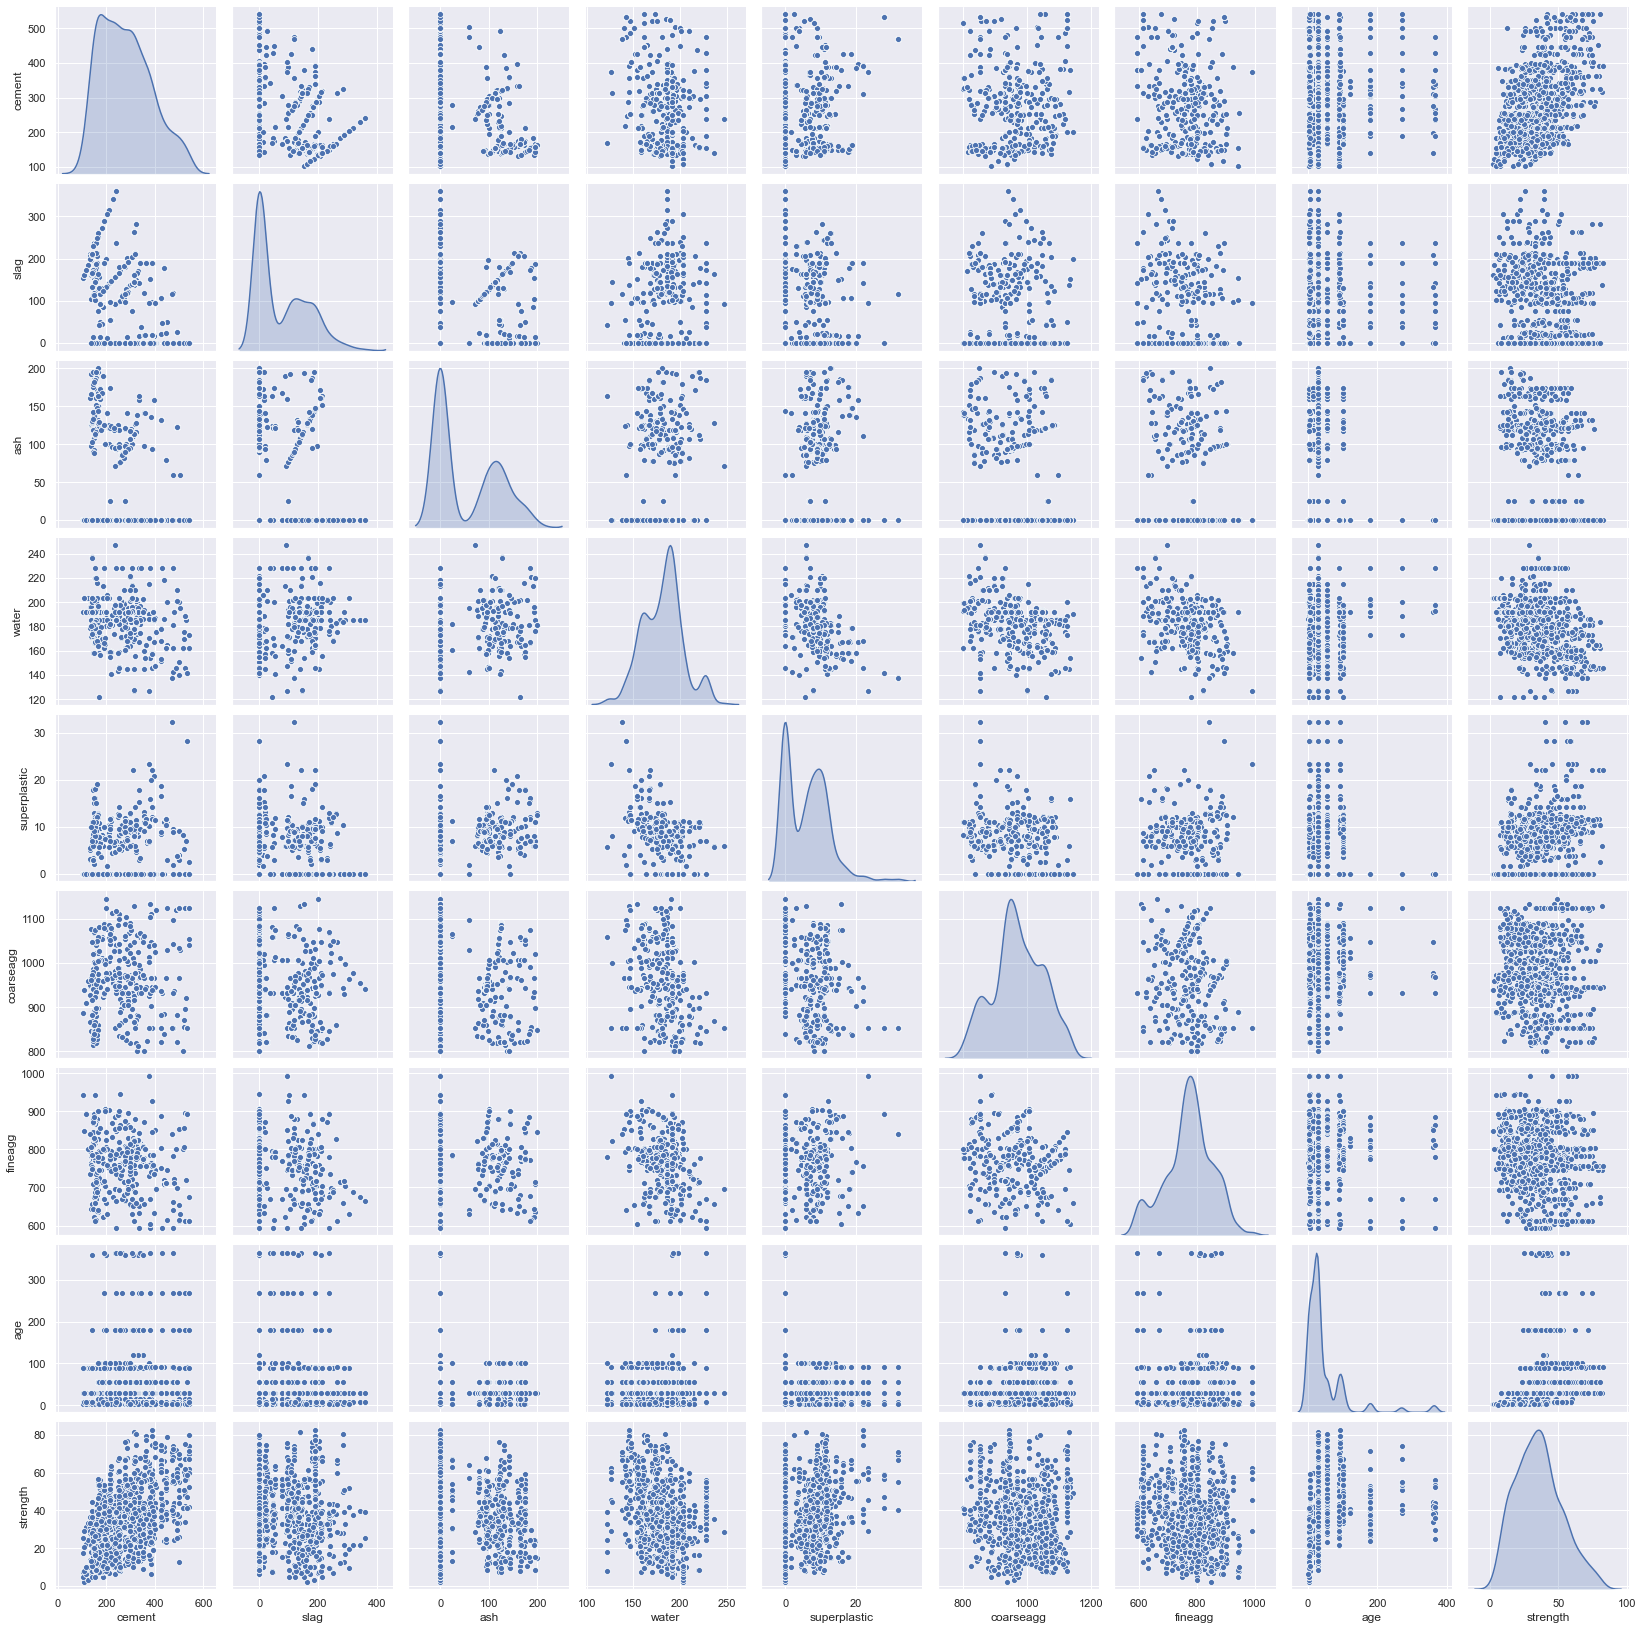

In [11]:
sns.pairplot(df_concrete , diag_kind = 'kde') #, hue='strength' , diag_kind = 'kde'

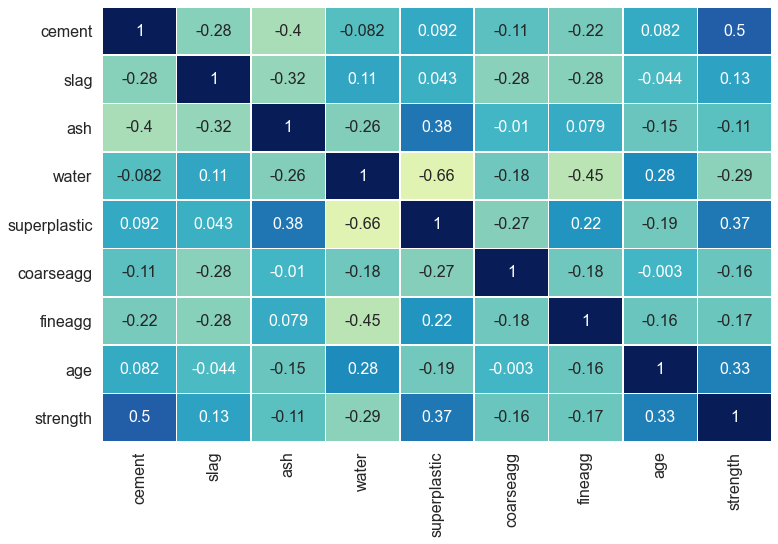

In [12]:
#### Correlation plot - Understanding degree of association among different variables
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
corr1 = df_concrete.corr()
#mask1 = np.tri(*corr.shape).T 
res = sns.heatmap(corr1,
            annot=True,
            #mask=mask1,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu", annot_kws={"size": 16})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.show()

#### Comments
- Cement and Strength are positively correlated. As the cement is increased the strength of the concrete is increased and vice versa.
- Slag and ash are negatively correlated with cement. If cement is costly then Slag and ash can be used. However strength will not grow at the same proportion with Slag and Ash comapred to cement.

- Water and strength are negatively correlated. To have strong concrete, water composition should be low. 
- Superplastic and water negatively correlated. Increase in superplastic will reduce water composition and vice versa. Decrease in water will increase concrete strength. 
- water and fine/coarse aggregate are negatively correlated. As water is increased the fine aggregate and coarse aggregate composition decreases if other materials are constant.


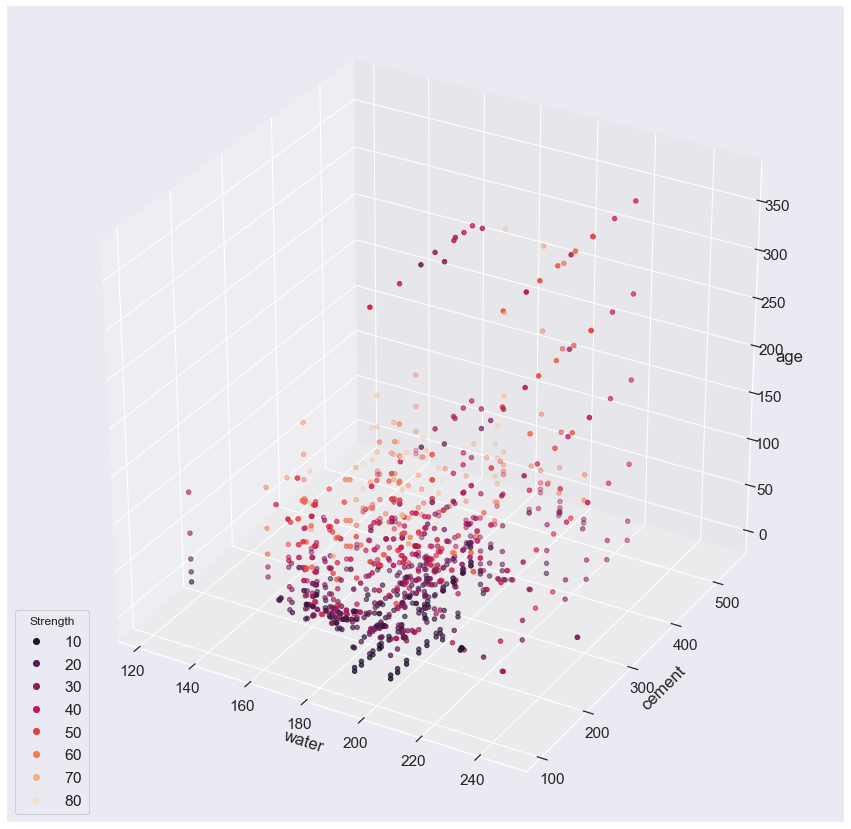

In [13]:
#plt.figure(figsize=(15,15))
#sns.scatterplot(y="cement", x="strength", hue="age",size = "water", data=df_concrete, legend = "brief", sizes=(20, 200))
plt.figure(figsize=(15,15))
from mpl_toolkits import mplot3d
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
ax=plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.set_xlabel('water')
ax.set_ylabel('cement')
ax.set_zlabel('age');
scatter = ax.scatter3D(df_concrete["water"], df_concrete["cement"], df_concrete["age"], c=df_concrete["strength"], label = df_concrete["water"]);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Strength")
ax.add_artist(legend1)

- we can see the strength is high when there is less water, high cement and age is high

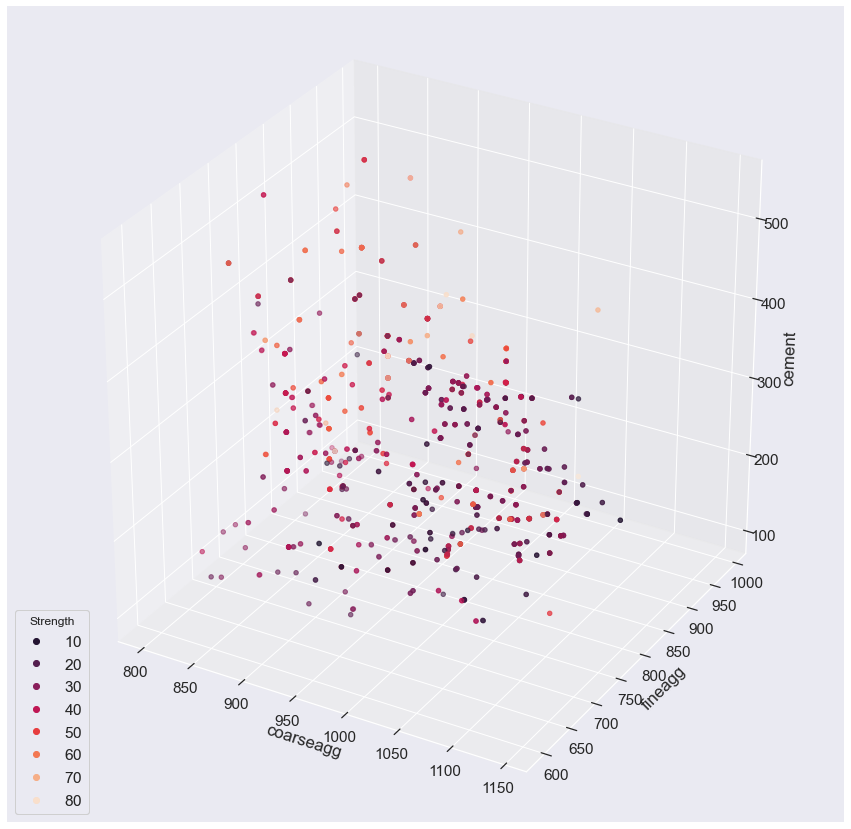

In [14]:
plt.figure(figsize=(15,15))
from mpl_toolkits import mplot3d
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
ax=plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.set_xlabel('coarseagg')
ax.set_ylabel('fineagg')
ax.set_zlabel('cement');
scatter = ax.scatter3D(df_concrete["coarseagg"], df_concrete["fineagg"], df_concrete["cement"], c=df_concrete["strength"], label = df_concrete["water"]);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Strength")
ax.add_artist(legend1)

- More fine and coarse aggregate usage is reducing the cement composition but also reduction in strength of the concrete

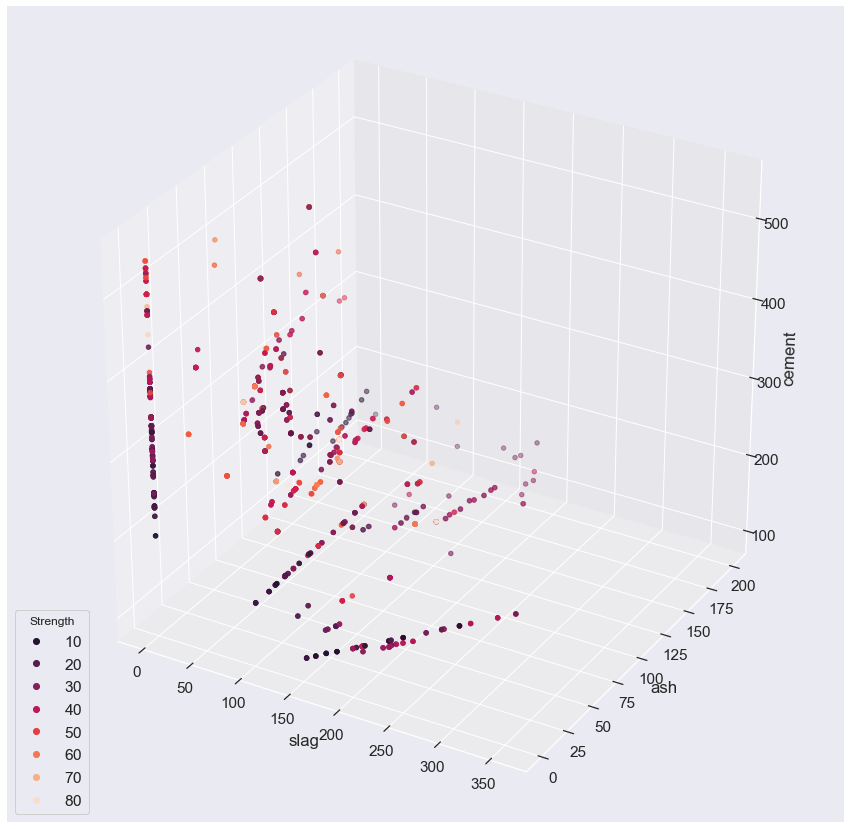

In [15]:
plt.figure(figsize=(15,15))
from mpl_toolkits import mplot3d
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
ax=plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.set_xlabel('slag')
ax.set_ylabel('ash')
ax.set_zlabel('cement');
scatter = ax.scatter3D(df_concrete["slag"], df_concrete["ash"], df_concrete["cement"], c=df_concrete["strength"], label = df_concrete["water"]);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Strength")
ax.add_artist(legend1)

- higher cement and low slag and ash is increaing the strength of the concrete

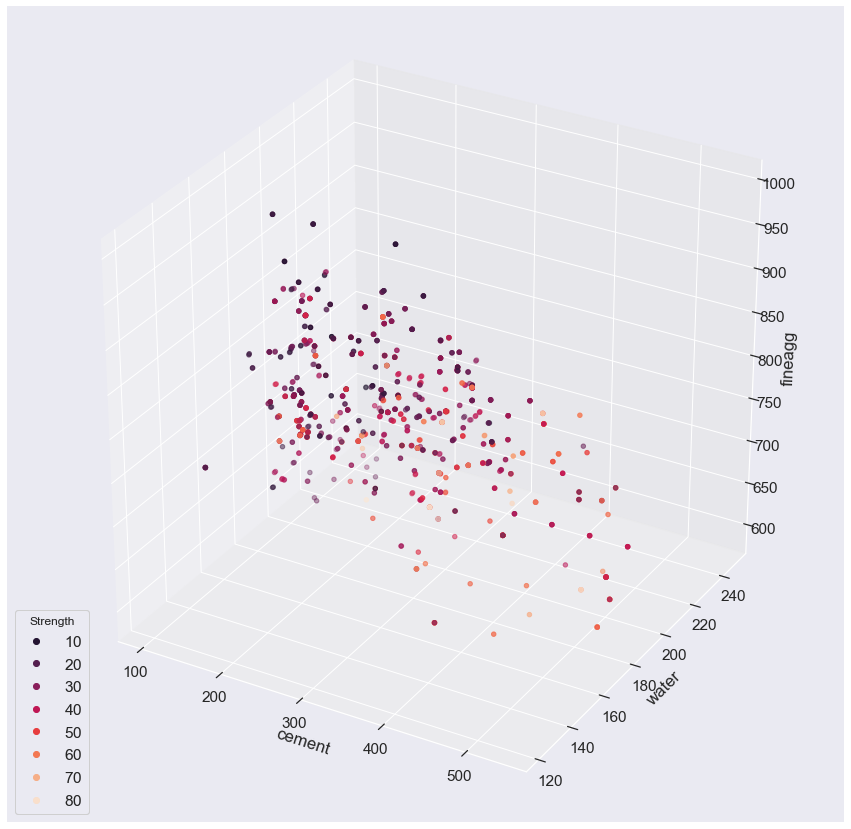

In [16]:
#plt.figure(figsize=(15,15))
#sns.scatterplot(y="cement", x="strength", hue="age",size = "water", data=df_concrete, legend = "brief", sizes=(20, 200))

plt.figure(figsize=(15,15))
from mpl_toolkits import mplot3d
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
ax=plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.set_xlabel('cement')
ax.set_ylabel('water')
ax.set_zlabel('fineagg');
scatter = ax.scatter3D(df_concrete["cement"], df_concrete["water"], df_concrete["fineagg"], c=df_concrete["strength"], label = df_concrete["water"]);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Strength")
ax.add_artist(legend1)

- For higher cement, water and lower fine aggregate the strength of the concrete looks high

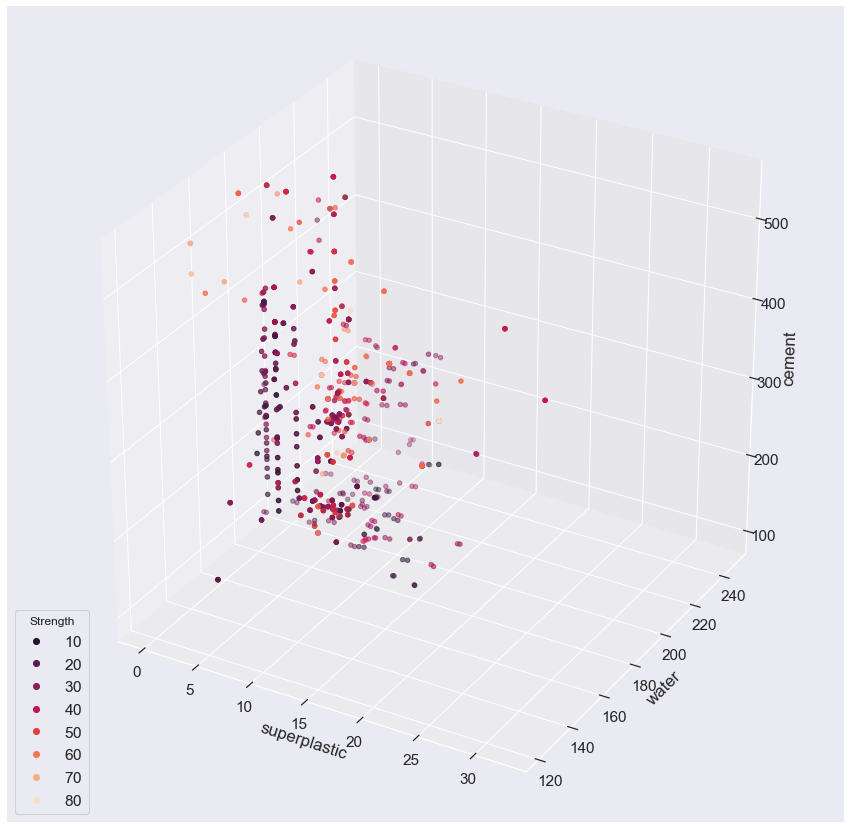

In [17]:
#plt.figure(figsize=(15,15))
#sns.scatterplot(y="cement", x="strength", hue="age",size = "water", data=df_concrete, legend = "brief", sizes=(20, 200))

plt.figure(figsize=(15,15))
from mpl_toolkits import mplot3d
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
ax=plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.set_xlabel('superplastic')
ax.set_ylabel('water')
ax.set_zlabel('cement');
scatter = ax.scatter3D(df_concrete["superplastic"], df_concrete["water"], df_concrete["cement"], c=df_concrete["strength"], label = df_concrete["water"]);
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Strength")
ax.add_artist(legend1)

- Looks like for a given ratio of superplastic and water, the increase in cement increases the strength

<b> Comment </b>
From above analysis, the below ratios are very important when making concrete
- Cement Vs Slag, Ash, Fine aggregate
- Water Vs Superplasticizer
- Water Vs Fine and Coarse  aggregate

#### 3) Feature Engineering techniques
3a) Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)

- we will create new feature called total weight which will be sum of all materials in the concrete
- In addition we calculate proportion(percentage) of each material out of total weight. By doing so we can remove the features which have minor impact on strength. Removing features without proportion features may impact the model score.

In [18]:
df_concrete_ratio = pd.DataFrame({})
df_concrete_ratio["total_weight"]=df_concrete["cement"] + df_concrete["slag"] + df_concrete["ash"] + df_concrete["water"] + df_concrete["superplastic"] + df_concrete["coarseagg"] + df_concrete["fineagg"]
df_concrete_ratio["cement_ratio"]=df_concrete["cement"] / df_concrete_ratio["total_weight"] 
df_concrete_ratio["slag_ratio"]=df_concrete["slag"] / df_concrete_ratio["total_weight"] 
df_concrete_ratio["ash_ratio"]=df_concrete["ash"] / df_concrete_ratio["total_weight"] 
df_concrete_ratio["water_ratio"]=df_concrete["water"] / df_concrete_ratio["total_weight"] 
df_concrete_ratio["plastic_ratio"]=df_concrete["superplastic"] / df_concrete_ratio["total_weight"] 
df_concrete_ratio["fineagg_ratio"]=df_concrete["fineagg"] / df_concrete_ratio["total_weight"] 
df_concrete_ratio["coarseagg_ratio"]=df_concrete["coarseagg"] / df_concrete_ratio["total_weight"] 
df_concrete_ratio["age"] = df_concrete["age"]
df_concrete_ratio["strength"] = df_concrete["strength"]

In [19]:
df_concrete_ratio.describe().T

,count,mean,std,min,25%,50%,75%,max
total_weight,1030.0,2343.523398,65.365356,2194.600000,2291.150000,2349.100000,2390.400000,2551.000000
cement_ratio,1030.0,0.119553,0.043101,0.044815,0.082058,0.115282,0.149170,0.225406
slag_ratio,1030.0,0.031643,0.036961,0.000000,0.000000,0.009455,0.061972,0.150339
ash_ratio,1030.0,0.023174,0.027462,0.000000,0.000000,0.000000,0.050335,0.088838
water_ratio,1030.0,0.077727,0.010900,0.051390,0.069538,0.078623,0.083861,0.112222
plastic_ratio,1030.0,0.002621,0.002495,0.000000,0.000000,0.002727,0.004351,0.013149
fineagg_ratio,1030.0,0.330117,0.033244,0.247971,0.311208,0.330542,0.354096,0.414147
coarseagg_ratio,1030.0,0.415165,0.031020,0.345890,0.392294,0.420464,0.437598,0.479846
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,35.817961,16.705742,2.330000,23.710000,34.445000,46.135000,82.600000


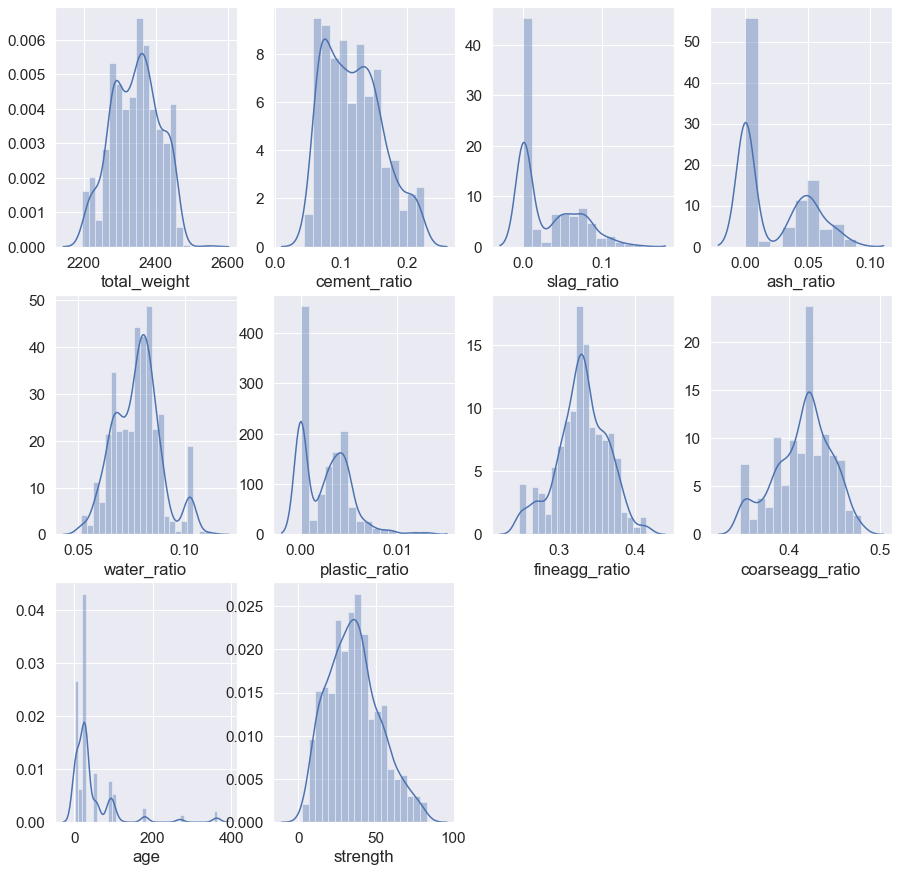

In [20]:
#analysis of the body of distributions/tails.
plt.figure(figsize=(15,15))
pos = 1
for i in df_concrete_ratio.columns:
    plt.subplot(3, 4, pos)
    sns.distplot(df_concrete_ratio[i])
    pos += 1 

- Distribution is same as earlier

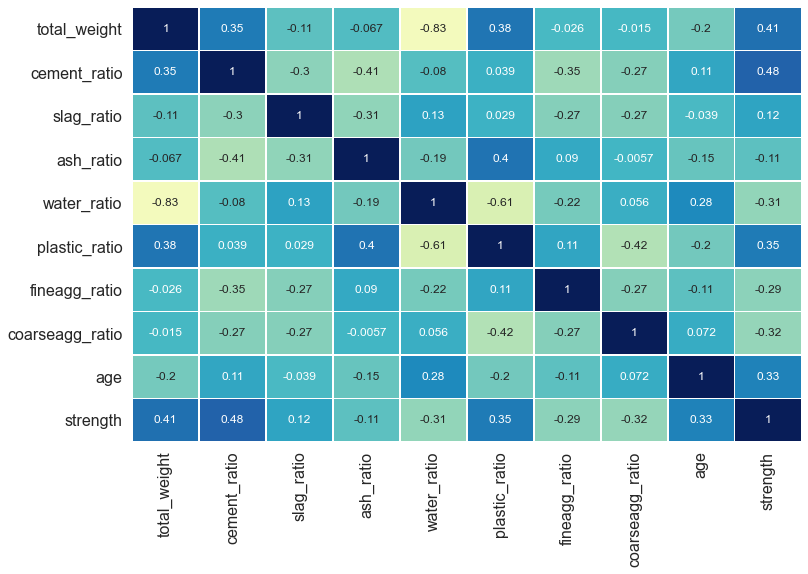

In [21]:
#### Correlation plot - Understanding degree of association among different features
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
corr1 = df_concrete_ratio.corr()
#mask1 = np.tri(*corr.shape).T 
res = sns.heatmap(corr1,
            annot=True,
            #mask=mask1,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu", annot_kws={"size": 12})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.show()

- we can see there is high impact on strength by cement ratio followed by weight and superplastic. However low impact on strength due to Slag and ash ratio.
- Also the weight of the concrete is negatively impacted by water ratio

In [22]:
#We will replace the data with ratios. By doing so we can drop non important features. 
#However we will decide to drop or not after confirming the RSquared score
df_concrete = df_concrete_ratio

#df_concrete = df_concrete_ratio.drop(columns=['slagratio','ashratio']) # slight decrease in Rsquared score when dropped

3b) Get the data model ready and do a train test split.

In [23]:
#Remove duplicates
print('before',df_concrete.shape)
df_concrete.drop_duplicates(inplace = True)
print('after removing duplicates',df_concrete.shape)

before (1030, 10)
after removing duplicates (1005, 10)


#### Outliers(Commenting this part as the score is better with outliers)

#Removing the outliers
col_names=df_concrete.columns
display(col_names)
for i in col_names:
    q1, q2, q3 = df_concrete[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    lower_cap=q1-1.5*IQR
    upper_cap=q3+1.5*IQR
    #df_concrete=df_concrete[i].apply(lambda x: upper_cap if x>(upper_cap) else (lower_cap if x<(lower_cap) else x)).drop
    df_concrete = df_concrete[(df_concrete[i] >= (q1 - 1.5 * IQR)) & (df_concrete[i] <= (q3 + 1.5 * IQR))]
    

print('after removing outliers rows',df_concrete.shape)

df_concrete.describe().T

df_concrete_backup.shape

Around 10% of the records have outliers

In [24]:
# independant variables
X = df_concrete.drop('strength',axis=1)
# dependent variable
Y = df_concrete[['strength']]

In [25]:
# splitting data into training and test set for independent attributes
x_train, x_test, y_train, y_test =train_test_split(X, Y, test_size=.3,
                                                   random_state=22)
x_train.shape,x_test.shape

((703, 9), (302, 9))

#### Feature Scaling
(Commented this part as the R2 Score is same for without and without standardscalar. for minmaxscalar the score is low. However the linear regression score is good if the scalar is minmax.)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 3c) Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)

We will select the polynomial degree based on the R2 Score and radomness pattern in the residual plot. If there is a pattern in the residuals then we will try higher degree. i will try different degrees and see how the score varies between train and test data.

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
linear1 = LinearRegression( n_jobs = -1)

In [28]:
resultsDf = pd.DataFrame({})
tempResultsDf  = pd.DataFrame({})
residualsDf  = pd.DataFrame({})

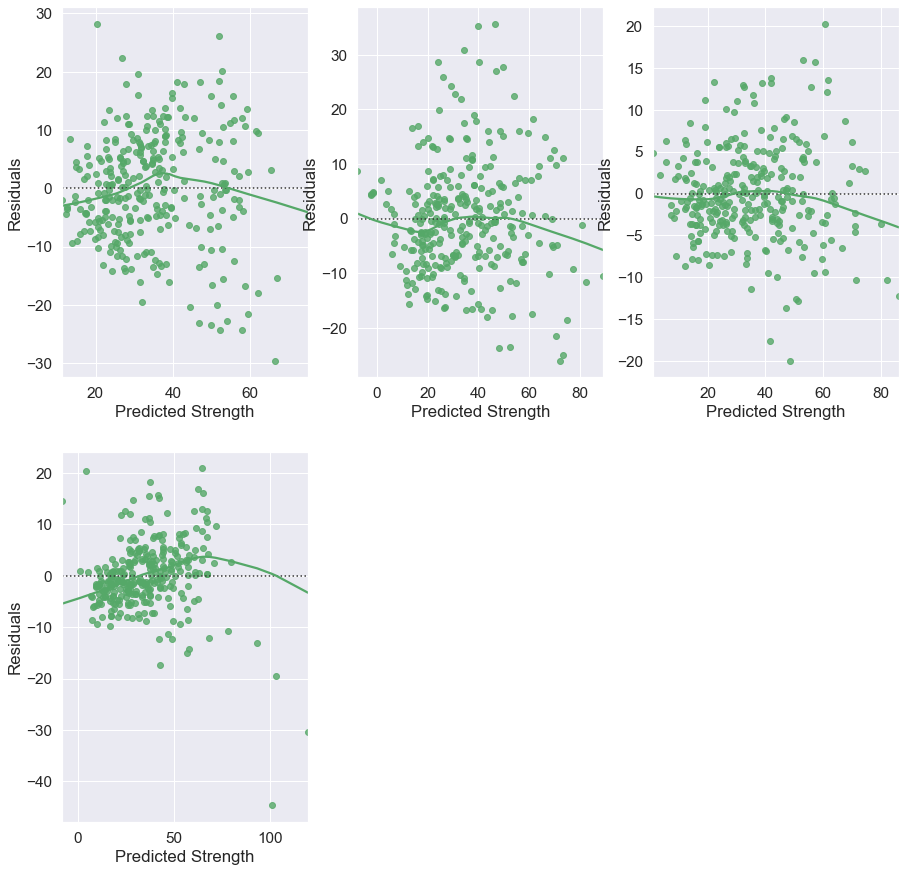

In [29]:
plt.figure(figsize=(15,15))
pos = 1
for i in [1,2,3,4]:
    poly = PolynomialFeatures(degree=i) #, interaction_only=True
    x_train2 = poly.fit_transform(x_train)
    x_test2 = poly.fit_transform(x_test)
    linear1.fit(x_train2, y_train)
    tempResultsDf = pd.DataFrame({'Method':['Linear Regression'], 'Degree': i, 'Score': 'RSquare', 'Train': linear1.score(x_train2, y_train), 'Test': linear1.score(x_test2, y_test), 'Gap': linear1.score(x_test2, y_test) - linear1.score(x_train2, y_train),'Kfold': 'No', 'Tuning': 'No'})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    y_test_predict = linear1.predict(x_test2)
    residuals = y_test - y_test_predict
    residuals = residuals.rename(columns={'strength': 'Residuals'})    
    ax = plt.subplot(2, 3, pos)
    ax.set_xlabel('Predicted Strength')
    sns.residplot(x=y_test_predict, y=residuals, lowess=True, color="g" , ax=ax, label = 'Test')
    pos += 1 

In [30]:
#resultsDf = resultsDf[['Method', 'Degree','Interaction Only', 'Score','Train','Test', 'Kfold', 'Tuning']]
#resultsDf.sort_values(by=['Test', 'Train','Gap'], ascending = [False,False,True])
resultsDf

,Method,Degree,Score,Train,Test,Gap,Kfold,Tuning
0,Linear Regression,1,RSquare,0.572040,0.671073,0.099034,No,No
0,Linear Regression,2,RSquare,0.532489,0.539395,0.006907,No,No
0,Linear Regression,3,RSquare,0.916681,0.881642,-0.035039,No,No
0,Linear Regression,4,RSquare,0.936241,0.790416,-0.145825,No,No


- From the residual plot, there is no precise pattern. I will pickup the polymial degree with high RSquare and low gap between test and train score. 
- Degree 3 has high Rsquare score but the gap between train and test score is slightly high compared to degree 2.
- We will take degree 3 data for linear regressor model

#### 4)Creating the Model and Tuning It:
4a) Algorithms that you think will be suitable for this project.

Since this is a regression problem, we will use following algorithms
- linear regressior(degree 3) 
- Lasso(degree 1,2,3)
- Ridge(degree 1,2,3)
- Random Forest Regressor
- Bagging
- Ada Boosting
- Gradient Bossting

In [31]:
#Linear Regressors
poly = PolynomialFeatures(degree=3) #, interaction_only=True
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
linear1.fit(x_train2, y_train)
print('Degree:3', ' Train RSquared', linear1.score(x_train2, y_train))
print('Degree:3', ' Test RSquared', linear1.score(x_test2, y_test))
tempResultsDf = pd.DataFrame({'Method':['Linear Regression'], 'Degree': 2, 'Score': 'RSquare', 'Train': linear1.score(x_train2, y_train), 'Test': linear1.score(x_test2, y_test), 'Gap': linear1.score(x_test2, y_test) - linear1.score(x_train2, y_train), 'Kfold': 'No', 'Tuning': 'No'})
resultsDf = pd.concat([resultsDf, tempResultsDf])

Degree:3  Train RSquared 0.91668051252185
Degree:3  Test RSquared 0.8816416233114532


In [32]:
#Get important features
linear1.fit(x_train, y_train)
importance = linear1.coef_
print(importance)
importance1 = pd.DataFrame(importance, columns = X.columns)
importance1

[[ 1.78410527e-02  8.70166364e+01  4.66904404e+01  2.01919437e+00
  -5.30942585e+02  6.77282072e+02 -1.33950819e+02 -1.48114938e+02
   1.06915068e-01]]


,total_weight,cement_ratio,slag_ratio,ash_ratio,water_ratio,plastic_ratio,fineagg_ratio,coarseagg_ratio,age
0,0.017841,87.016636,46.69044,2.019194,-530.942585,677.282072,-133.950819,-148.114938,0.106915


we can see how important are the features for degree 3 linear regression

In [33]:
#Lasso
from sklearn import linear_model
lassoreg1 = linear_model.Lasso(alpha=0.01, random_state = 22)
for i in [1,2,3,4,5,6]:
    poly = PolynomialFeatures(degree=i) #, interaction_only=True
    x_train2 = poly.fit_transform(x_train)
    x_test2 = poly.fit_transform(x_test)
    lassoreg1.fit(x_train2, y_train)
    print('Degree:', i, ' Train RSquared', lassoreg1.score(x_train2, y_train))
    print('Degree:', i, ' Test RSquared ', lassoreg1.score(x_test2, y_test))
    print('')
    tempResultsDf = pd.DataFrame({'Method':['Lasso'], 'Degree': i, 'Score': 'RSquare', 'Train': lassoreg1.score(x_train2, y_train), 'Test': lassoreg1.score(x_test2, y_test), 'Gap': lassoreg1.score(x_test2, y_test) - lassoreg1.score(x_train2, y_train), 'Kfold': 'No', 'Tuning': 'No'})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

Degree: 1  Train RSquared 0.5502029007806999
Degree: 1  Test RSquared  0.6568342220325323

Degree: 2  Train RSquared 0.7311644788522925
Degree: 2  Test RSquared  0.7743695415253216

Degree: 3  Train RSquared 0.8438550375468202
Degree: 3  Test RSquared  0.8658099872265639

Degree: 4  Train RSquared 0.881057791683047
Degree: 4  Test RSquared  0.8913779169691122

Degree: 5  Train RSquared 0.9108777651100987
Degree: 5  Test RSquared  0.910989131023345

Degree: 6  Train RSquared 0.9291991247597505
Degree: 6  Test RSquared  0.9076304143095509



- Looks like degree 5 lasso train and test Rsquares are good with less gap

In [34]:
#Ridge
from sklearn import linear_model
Ridgereg1 = linear_model.Ridge(alpha=0.01, random_state = 22)
for i in [1,2,3,4,5,6]:
    poly = PolynomialFeatures(degree=i) #, interaction_only=True
    x_train2 = poly.fit_transform(x_train)
    x_test2 = poly.fit_transform(x_test)
    Ridgereg1.fit(x_train2, y_train)
    print('Degree:', i, ' Train RSquared', Ridgereg1.score(x_train2, y_train))
    print('Degree:', i, ' Test RSquared ', Ridgereg1.score(x_test2, y_test))
    print('')
    tempResultsDf = pd.DataFrame({'Method':['Ridge'], 'Degree': i, 'Score': 'RSquare', 'Train': Ridgereg1.score(x_train2, y_train), 'Test': Ridgereg1.score(x_test2, y_test), 'Gap': Ridgereg1.score(x_test2, y_test) - Ridgereg1.score(x_train2, y_train), 'Kfold': 'No', 'Tuning': 'No'})
    resultsDf = pd.concat([resultsDf, tempResultsDf])

Degree: 1  Train RSquared 0.5649461477622224
Degree: 1  Test RSquared  0.6704602744612431

Degree: 2  Train RSquared 0.7396983663124104
Degree: 2  Test RSquared  0.7787079100712051

Degree: 3  Train RSquared 0.8637329791575761
Degree: 3  Test RSquared  0.875148992947545

Degree: 4  Train RSquared 0.5550734711146661
Degree: 4  Test RSquared  0.373318033229596

Degree: 5  Train RSquared 0.8215742857788406
Degree: 5  Test RSquared  0.8409321419273676

Degree: 6  Train RSquared 0.8208193304979536
Degree: 6  Test RSquared  0.8394450192992131



- Looks like degree 3 Ridge train and test Rsquares are good with less gap

In [35]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 1000,  n_jobs = -1, random_state=1)
regr.fit(x_train, y_train)
print('base_estimator_', regr.n_features_)
print(' Train RSquared', regr.score(x_train, y_train))
print(' Test RSquared ', regr.score(x_test, y_test))
print('')
tempResultsDf = pd.DataFrame({'Method':['RandomForestRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': regr.score(x_train, y_train), 'Test': regr.score(x_test, y_test), 'Gap': regr.score(x_test, y_test) - regr.score(x_train, y_train), 'Kfold': 'No', 'Tuning': 'No'})
resultsDf = pd.concat([resultsDf, tempResultsDf])

base_estimator_ 9
 Train RSquared 0.9816988205279499
 Test RSquared  0.9223582075072785



In [36]:
print (pd.DataFrame(regr.feature_importances_, columns = ["Imp"], index = x_test.columns).sort_values(by=['Imp'], ascending = [False]))

                      Imp
age              0.350165
total_weight     0.286721
cement_ratio     0.106448
coarseagg_ratio  0.057079
water_ratio      0.056676
slag_ratio       0.050796
fineagg_ratio    0.050153
plastic_ratio    0.023812
ash_ratio        0.018150


In [37]:
#Bagging
from sklearn.ensemble import BaggingRegressor
bgrg = BaggingRegressor(n_estimators=500, random_state=22, n_jobs=-1)
bgrg = bgrg.fit(x_train, y_train.values.ravel())
print(' Train RSquared' , bgrg.score(x_train, y_train))
print(' Test RSquared ', bgrg.score(x_test, y_test))
print('')
tempResultsDf = pd.DataFrame({'Method':['BaggingRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': bgrg.score(x_train, y_train), 'Test': bgrg.score(x_test, y_test), 'Gap': bgrg.score(x_test, y_test) - bgrg.score(x_train, y_train), 'Kfold': 'No', 'Tuning': 'No'})
resultsDf = pd.concat([resultsDf, tempResultsDf])

 Train RSquared 0.9815729741994914
 Test RSquared  0.9211866848881047



In [38]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bgrg.estimators_
], axis=0)
display(feature_importances)
print (pd.DataFrame(feature_importances, columns = ["Imp"], index = x_test.columns).sort_values(by=['Imp'], ascending = [False]))

array([0.28671672, 0.10799869, 0.05191639, 0.01712442, 0.05686817,
       0.02264835, 0.04968118, 0.05734536, 0.34970072])

                      Imp
age              0.349701
total_weight     0.286717
cement_ratio     0.107999
coarseagg_ratio  0.057345
water_ratio      0.056868
slag_ratio       0.051916
fineagg_ratio    0.049681
plastic_ratio    0.022648
ash_ratio        0.017124


In [39]:
#AdaBoosting
from sklearn.ensemble import AdaBoostRegressor
abrg = AdaBoostRegressor(n_estimators = 500, loss = 'square',random_state=22) #'linear', 'square', or 'exponential'
abrg = abrg.fit(x_train, y_train.values.ravel())
print(' Train RSquared',abrg.score(x_train, y_train))
print(' Test RSquared ', abrg.score(x_test, y_test))
tempResultsDf = pd.DataFrame({'Method':['AdaBoostRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': abrg.score(x_train, y_train), 'Test': abrg.score(x_test, y_test), 'Gap': abrg.score(x_test, y_test) - abrg.score(x_train, y_train), 'Kfold': 'No', 'Tuning': 'No'})
resultsDf = pd.concat([resultsDf, tempResultsDf])

 Train RSquared 0.8290017533827019
 Test RSquared  0.8154543088204212


In [40]:
print (pd.DataFrame(abrg.feature_importances_, columns = ["Imp"], index = x_test.columns).sort_values(by=['Imp'], ascending = [False]))

                      Imp
age              0.284937
cement_ratio     0.174078
water_ratio      0.162402
fineagg_ratio    0.097635
total_weight     0.095861
coarseagg_ratio  0.083589
plastic_ratio    0.051573
slag_ratio       0.046300
ash_ratio        0.003625


In [41]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
gbrg = GradientBoostingRegressor(n_estimators = 500, loss = 'ls',random_state=22) #'linear', 'square', or 'exponential'
gbrg = gbrg.fit(x_train, y_train.values.ravel())
print(' Train RSquared',gbrg.score(x_train, y_train))
print(' Test RSquared ', gbrg.score(x_test, y_test))
tempResultsDf = pd.DataFrame({'Method':['GradientBoostingRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': gbrg.score(x_train, y_train), 'Test': gbrg.score(x_test, y_test), 'Gap': gbrg.score(x_test, y_test) - gbrg.score(x_train, y_train), 'Kfold': 'No', 'Tuning': 'No'})
resultsDf = pd.concat([resultsDf, tempResultsDf])

 Train RSquared 0.9887323269430419
 Test RSquared  0.9510118219190161


In [42]:
print (pd.DataFrame(gbrg.feature_importances_, columns = ["Imp"], index = x_test.columns).sort_values(by=['Imp'], ascending = [False]))

                      Imp
age              0.377061
total_weight     0.223960
cement_ratio     0.141427
water_ratio      0.071068
fineagg_ratio    0.052120
coarseagg_ratio  0.050900
slag_ratio       0.047499
plastic_ratio    0.028245
ash_ratio        0.007719


In [43]:
resultsDf

,Method,Degree,Score,Train,Test,Gap,Kfold,Tuning
0,Linear Regression,1,RSquare,0.572040,0.671073,0.099034,No,No
0,Linear Regression,2,RSquare,0.532489,0.539395,0.006907,No,No
0,Linear Regression,3,RSquare,0.916681,0.881642,-0.035039,No,No
0,Linear Regression,4,RSquare,0.936241,0.790416,-0.145825,No,No
0,Linear Regression,2,RSquare,0.916681,0.881642,-0.035039,No,No
0,Lasso,1,RSquare,0.550203,0.656834,0.106631,No,No
0,Lasso,2,RSquare,0.731164,0.774370,0.043205,No,No
0,Lasso,3,RSquare,0.843855,0.865810,0.021955,No,No
0,Lasso,4,RSquare,0.881058,0.891378,0.010320,No,No
0,Lasso,5,RSquare,0.910878,0.910989,0.000111,No,No


We will pick below models where the test score is above 90
- Lasso(degree 5)
- RandomForest
- Bagging
- Gradient boosting

#### 4b) Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)

<b>Kfold: We will perform cross validation for Linear Regression(Degree2), Random Forest, Bagging and Boosting</b>

In [44]:
from sklearn.model_selection import cross_val_score, cross_val_predict,KFold

# KFold will split the data in 10 equal parts
k =  KFold(random_state=7,n_splits=10)
print(k)
scoring ='r2'

KFold(n_splits=10, random_state=7, shuffle=False)


In [45]:
# Lasso
lassoreg1 = linear_model.Lasso(alpha=0.01, random_state = 22)
poly = PolynomialFeatures(degree=5) #, interaction_only=True
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)
lassoreg1.fit(x_train2, y_train)
print('Degree:5', ' Train RSquared', lassoreg1.score(x_train2, y_train))
print('Degree:5', ' Test RSquared ', lassoreg1.score(x_test2, y_test))
print('')
scores = cross_val_score(lassoreg1, x_train2, y_train, cv=k,scoring=scoring)  #'binary', 'multiclass'
print(scores)
print("Mean of Scores",scores.mean())
print("Standard Deviation of Scores",scores.std())
tempResultsDf = pd.DataFrame({'Method':['Lasso'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': scores.mean(), 'Test': 'NA', 'Kfold': 'Yes', 'Tuning': 'No', 'STD':scores.std()})
resultsDf = pd.concat([resultsDf, tempResultsDf])

Degree:5  Train RSquared 0.9108777651100987
Degree:5  Test RSquared  0.910989131023345

[0.83112835 0.93580981 0.82720036 0.83346256 0.86690163 0.81502078
 0.87075257 0.84593104 0.80854064 0.8491969 ]
Mean of Scores 0.8483944652188995
Standard Deviation of Scores 0.03487543087127388


- Lasso mean score went down during kfold validation

In [46]:
# Random Forest
regr = RandomForestRegressor(n_estimators = 1000,  n_jobs = -1, random_state=22)
#regr.fit(x_train, y_train)
scores = cross_val_score(regr, x_train, y_train, cv=k,scoring=scoring)  #'binary', 'multiclass'
print(scores)
print("Mean of Scores",scores.mean())
print("Standard Deviation of Scores",scores.std())
tempResultsDf = pd.DataFrame({'Method':['RandomForestRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': scores.mean(), 'Test': 'NA', 'Kfold': 'Yes', 'Tuning': 'No', 'STD':scores.std()})
resultsDf = pd.concat([resultsDf, tempResultsDf])

[0.86599253 0.93126762 0.87981098 0.89403903 0.84208935 0.87690641
 0.83563278 0.88501028 0.79281746 0.90243142]
Mean of Scores 0.8705997871744625
Standard Deviation of Scores 0.036989691494605674


- Random Forest mean score went down during kfold validation

In [47]:
#Bagging
bgrg = BaggingRegressor(n_estimators=1000, random_state=22, n_jobs=-1)
scores = cross_val_score(bgrg, x_train, y_train, cv=k,scoring=scoring)  
print(scores)
print("Mean of Scores",scores.mean())
print("Standard Deviation of Scores",scores.std())
tempResultsDf = pd.DataFrame({'Method':['BaggingRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': scores.mean(), 'Test': 'NA', 'Kfold': 'Yes', 'Tuning': 'No', 'STD':scores.std()})
resultsDf = pd.concat([resultsDf, tempResultsDf])

[0.86594756 0.93111894 0.87999779 0.89519326 0.84115304 0.87644482
 0.83599121 0.88603448 0.79332135 0.90166341]
Mean of Scores 0.870686584784764
Standard Deviation of Scores 0.036947885794575565


- Bagging mean score went down during kfold validation

In [48]:
#GradientBoosting
gbrg = GradientBoostingRegressor(n_estimators = 1000, loss = 'ls',random_state=22) #'linear', 'square', or 'exponential'
scores = cross_val_score(gbrg, x_train, y_train, cv=k,scoring=scoring) 
print(scores)
print("Mean of Scores",scores.mean())
print("Standard Deviation of Scores",scores.std())
tempResultsDf = pd.DataFrame({'Method':['GradientBoostingRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': scores.mean(), 'Test': 'NA', 'Kfold': 'Yes', 'Tuning': 'No', 'STD':scores.std()})
resultsDf = pd.concat([resultsDf, tempResultsDf])

[0.91335939 0.94900039 0.89296009 0.91727462 0.85354022 0.87435617
 0.87809772 0.92439976 0.91771758 0.92902937]
Mean of Scores 0.9049735308893487
Standard Deviation of Scores 0.0277991303363145


- GradientBoosting mean score went down but above 90 during kfold validation

In [49]:
resultsDf

,Method,Degree,Score,Train,Test,Gap,Kfold,Tuning,STD
0,Linear Regression,1,RSquare,0.572040,0.671073,0.099034,No,No,NaN
0,Linear Regression,2,RSquare,0.532489,0.539395,0.006907,No,No,NaN
0,Linear Regression,3,RSquare,0.916681,0.881642,-0.035039,No,No,NaN
0,Linear Regression,4,RSquare,0.936241,0.790416,-0.145825,No,No,NaN
0,Linear Regression,2,RSquare,0.916681,0.881642,-0.035039,No,No,NaN
0,Lasso,1,RSquare,0.550203,0.656834,0.106631,No,No,NaN
0,Lasso,2,RSquare,0.731164,0.77437,0.043205,No,No,NaN
0,Lasso,3,RSquare,0.843855,0.86581,0.021955,No,No,NaN
0,Lasso,4,RSquare,0.881058,0.891378,0.010320,No,No,NaN
0,Lasso,5,RSquare,0.910878,0.910989,0.000111,No,No,NaN


#### 4c) Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)

<b> Hyper Tuning - Random Forest</b>

In [50]:
#Grid Search Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
params = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['auto'],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1,2],
    'n_estimators': [1000,1500]
}
regr = RandomForestRegressor(n_estimators = 1000,  n_jobs = -1, random_state=1)
grid_search_modelrf=GridSearchCV(regr,params,cv=k, n_jobs=-1)
grid_search_modelrf.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10],
                         'max_features': ['auto'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [1000, 1500]})

In [51]:
grid_search_modelrf.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=1500, n_jobs=-1,
                      random_state=1)

In [52]:
grid_search_modelrf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [53]:
print('Best mean', grid_search_modelrf.best_score_)
print('Standard Deviation',grid_search_modelrf.cv_results_['std_test_score'][grid_search_modelrf.best_index_])

Best mean 0.8641675924240919
Standard Deviation 0.03514048186460813


In [54]:
print("Training Score",grid_search_modelrf.score(x_train,y_train))
print("Testing Score",grid_search_modelrf.score(x_test,y_test))
tempResultsDf = pd.DataFrame({'Method':['RandomForestRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': grid_search_modelrf.score(x_train,y_train), 'Test': grid_search_modelrf.score(x_test,y_test), 'Gap': grid_search_modelrf.score(x_test, y_test) - grid_search_modelrf.score(x_train, y_train), 'Kfold': 'Yes', 'Tuning': 'Grid', 'STD':grid_search_modelrf.cv_results_['std_test_score'][grid_search_modelrf.best_index_]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

Training Score 0.9709034494977881
Testing Score 0.9123339162290137


<b> Hyper Tuning - Bagging</b>

In [55]:

params = {"max_samples": [0.5, 1.0],
                          "max_features": [0.5, 1.0],
                          "n_estimators": [1000,1500]}
bgrg = BaggingRegressor(n_estimators=1000, random_state=22, n_jobs=-1)
grid_search_modelbag=GridSearchCV(bgrg,params,cv=k)
grid_search_modelbag.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             estimator=BaggingRegressor(n_estimators=1000, n_jobs=-1,
                                        random_state=22),
             param_grid={'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [1000, 1500]})

In [56]:
grid_search_modelbag.best_estimator_

BaggingRegressor(n_estimators=1500, n_jobs=-1, random_state=22)

In [57]:
grid_search_modelbag.best_params_

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 1500}

In [58]:
print('Best mean', grid_search_modelbag.best_score_)
print('Standard Deviation',grid_search_modelbag.cv_results_['std_test_score'][grid_search_modelbag.best_index_])

Best mean 0.8707552331463632
Standard Deviation 0.03714061980933962


In [59]:
print("Training Score",grid_search_modelbag.score(x_train,y_train))
print("Testing Score ",grid_search_modelbag.score(x_test,y_test))
tempResultsDf = pd.DataFrame({'Method':['BaggingRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': grid_search_modelbag.score(x_train,y_train), 'Test': grid_search_modelbag.score(x_test,y_test), 'Gap': grid_search_modelbag.score(x_test, y_test) - grid_search_modelbag.score(x_train, y_train), 'Kfold': 'Yes', 'Tuning': 'Grid', 'STD':grid_search_modelbag.cv_results_['std_test_score'][grid_search_modelbag.best_index_]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

Training Score 0.9817364487768196
Testing Score  0.9219318769302915


<b> Hyper Tuning - GradientBoosting</b>

In [60]:
#params = {'criterion':['mae'],'max_samples':[0.7,0.75,0.6,0.8],'bootstrap':[True],'n_estimators':list(range(10,120,10))}
#params = {'max_depth': [40],'n_estimators':list(range(200))}
params = {"max_features": [0.5, 1.0],
                          "n_estimators": [1000,1500]}
gbrg = GradientBoostingRegressor(n_estimators = 1000, loss = 'ls',random_state=22) #'linear', 'square', or 'exponential'
grid_search_modelgra=GridSearchCV(gbrg,params,cv=k)
grid_search_modelgra.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             estimator=GradientBoostingRegressor(n_estimators=1000,
                                                 random_state=22),
             param_grid={'max_features': [0.5, 1.0],
                         'n_estimators': [1000, 1500]})

In [61]:
grid_search_modelgra.best_estimator_

GradientBoostingRegressor(max_features=0.5, n_estimators=1000, random_state=22)

In [62]:
grid_search_modelgra.best_params_

{'max_features': 0.5, 'n_estimators': 1000}

In [63]:
print('Best mean', grid_search_modelgra.best_score_)
print('Standard Deviation',grid_search_modelgra.cv_results_['std_test_score'][grid_search_modelgra.best_index_])

Best mean 0.9104723451075312
Standard Deviation 0.027995062092260246


In [64]:
print("Training Score",grid_search_modelgra.score(x_train,y_train))
print("Testing Score ",grid_search_modelgra.score(x_test,y_test))
tempResultsDf = pd.DataFrame({'Method':['GradientBoostingRegressor'], 'Degree': 'NA', 'Score': 'RSquare', 'Train': grid_search_modelgra.score(x_train,y_train), 'Test': grid_search_modelgra.score(x_test,y_test), 'Gap': grid_search_modelgra.score(x_test, y_test) - grid_search_modelgra.score(x_train, y_train), 'Kfold': 'Yes', 'Tuning': 'Grid', 'STD':grid_search_modelgra.cv_results_['std_test_score'][grid_search_modelgra.best_index_]})
resultsDf = pd.concat([resultsDf, tempResultsDf])

Training Score 0.9923740924809055
Testing Score  0.951400145269296


#### 5)Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)

R2 Score signify the percent of the variance in concrete strength from the independent variables(Cement, Water, Coarse, ash ...). Increase in R2 Score can improve the prediction of concrete strength and in turn know if the concrete satisfies the business requirements (like load) or not. However too high R2 Score can be overfit and too low can be underfit. 

#### 6)Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)

<b> Recommendations </b>
- Increase in Slag and ash can decrease the cement composition. Based on the cost the ratio can be altered. However too much slag and ash will reduce concrete strength.
- Increasing the Superplastic reduces the water composition and increases the strength. However too much superplastic will reduce concrete strength. 
- Below ratios are very important when making strong concrete
  - Cement Vs Slag, Ash, Fine aggregate
  - Water Vs Superplasticizer
  - Water Vs Fine and Coarse  aggregate


#### 7)The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 - 90 (4 marks), 80 - 85( 3 marks), <80 (2 marks)

In [65]:
resultsDf.sort_values(by=['Test', 'Train','Gap'], ascending = [False,False,True])

,Method,Degree,Score,Train,Test,Gap,Kfold,Tuning,STD
0,GradientBoostingRegressor,NA,RSquare,0.904974,NA,NaN,Yes,No,0.027799
0,BaggingRegressor,NA,RSquare,0.870687,NA,NaN,Yes,No,0.036948
0,RandomForestRegressor,NA,RSquare,0.870600,NA,NaN,Yes,No,0.036990
0,Lasso,NA,RSquare,0.848394,NA,NaN,Yes,No,0.034875
0,GradientBoostingRegressor,NA,RSquare,0.992374,0.9514,-0.040974,Yes,Grid,0.027995
0,GradientBoostingRegressor,NA,RSquare,0.988732,0.951012,-0.037721,No,No,NaN
0,RandomForestRegressor,NA,RSquare,0.981699,0.922358,-0.059341,No,No,NaN
0,BaggingRegressor,NA,RSquare,0.981736,0.921932,-0.059805,Yes,Grid,0.037141
0,BaggingRegressor,NA,RSquare,0.981573,0.921187,-0.060386,No,No,NaN
0,RandomForestRegressor,NA,RSquare,0.970903,0.912334,-0.058570,Yes,Grid,0.035140


- From the above list we say that GradientBoostingRegressor(Row 5) is the best model with 95.14% prediction rate with a standard deviation of 0.027995
- we can predict the strength accurately between 92% to 97% with 68% confidence.
- we can predict the strength accurately between 89% to 100% with 95% confidence.
- we can predict the strength accurately between 86% to 100% with 99.7% confidence.